In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## ####univariate analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

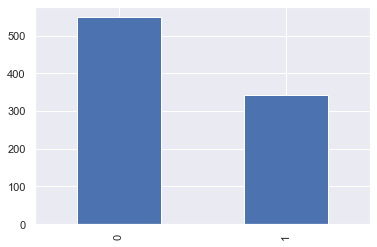

In [6]:
data['Survived'].value_counts().plot(kind='bar')

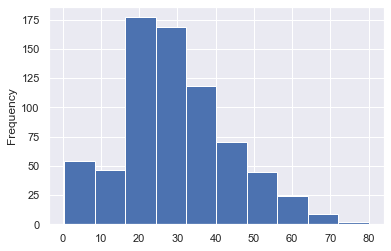

In [7]:
data['Age'].plot(kind='hist')

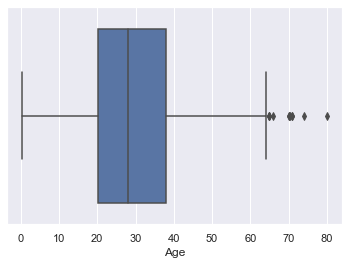

In [8]:
sns.boxplot(data['Age'])

### bivariate

In [9]:
gender_data=pd.crosstab(data['Sex'],data['Survived'])

In [10]:
gender_data

Survived,0,1
Sex,,
female,81,233
male,468,109


In [11]:
gender_data['total']=gender_data.sum(axis=1)

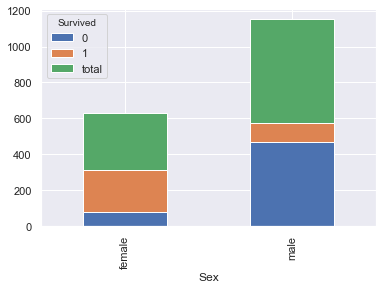

In [12]:
gender_data.plot(kind='bar',stacked=True)

In [13]:
gender_data= gender_data.apply(lambda x: round (100*x/gender_data['total']))

In [14]:
gender_data

Survived,0,1,total
Sex,,,
female,26.0,74.0,100.0
male,81.0,19.0,100.0


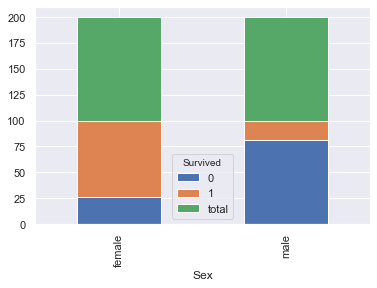

In [15]:
gender_data.plot(kind='bar',stacked=True)

In [16]:
gender_data= gender_data.apply(lambda x: round(100*x/gender_data['total']))

In [17]:
gender_data

Survived,0,1,total
Sex,,,
female,26.0,74.0,100.0
male,81.0,19.0,100.0


In [18]:
gender_data

Survived,0,1,total
Sex,,,
female,26.0,74.0,100.0
male,81.0,19.0,100.0


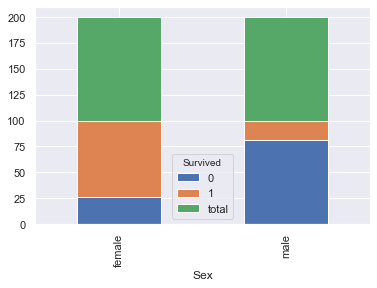

In [19]:
gender_data.plot(kind='bar',stacked=True)

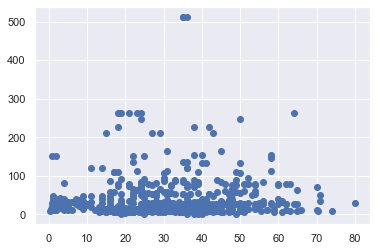

In [20]:
plt.scatter(data['Age'],data['Fare'])

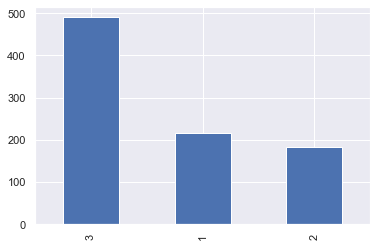

In [21]:
data['Pclass'].value_counts().plot(kind='bar')

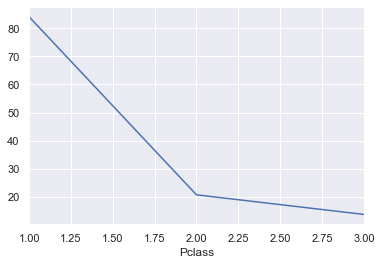

In [22]:
data.groupby('Pclass')['Fare'].mean().plot()

## multivariate analysis

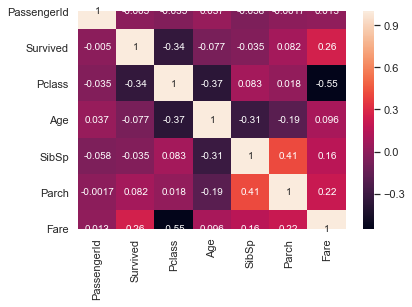

In [23]:
sns.heatmap(data.corr(),annot=True)

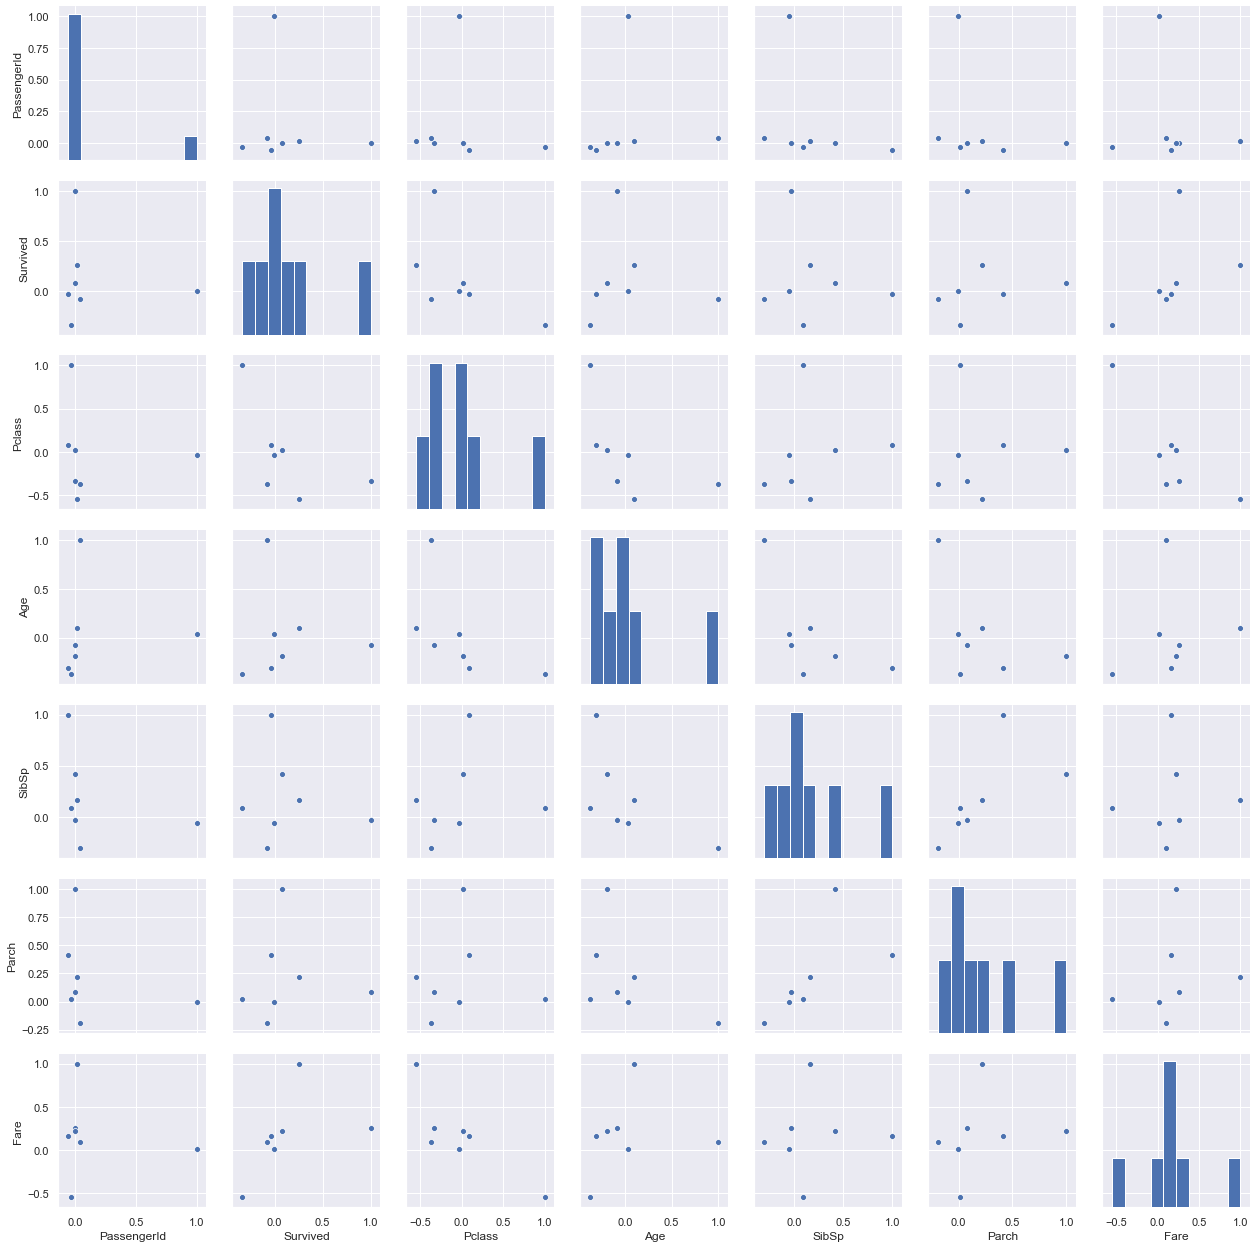

In [33]:
sns.pairplot(data.corr())

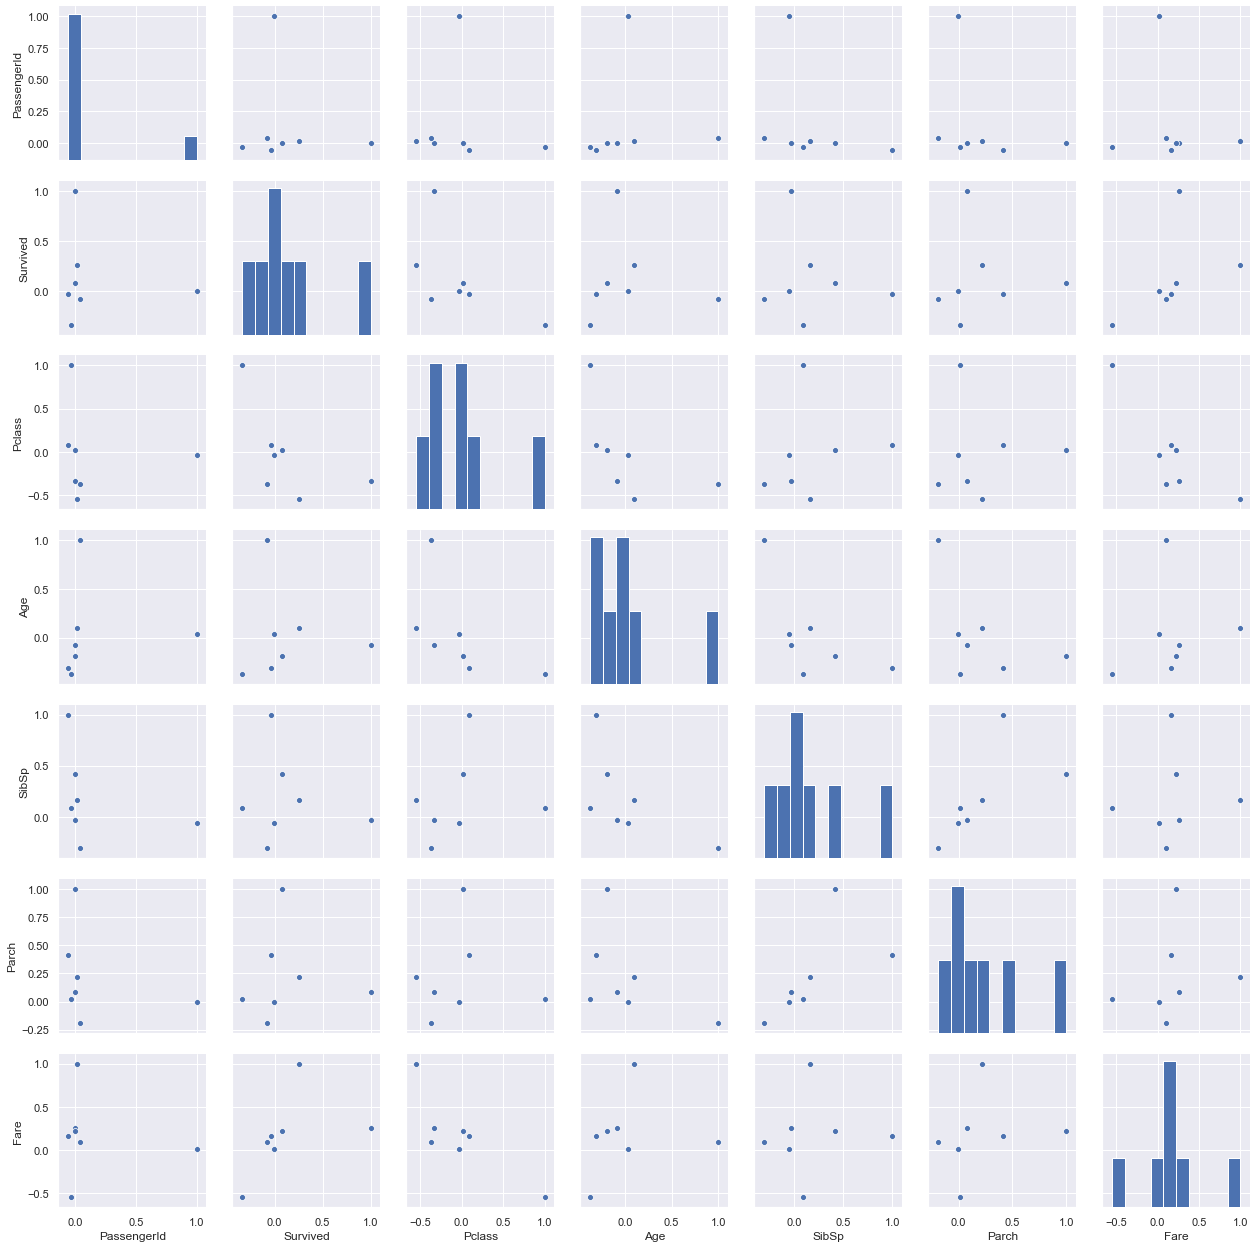

In [29]:
sns.pairplot(data.corr())

## machine learning

In [31]:
data.shape

(891, 12)

In [32]:
training_data= data[['Pclass','Fare']]

In [33]:
output_data=data['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X,x_test,Y,y_test= train_test_split(training_data,output_data,
                                    test_size=0.3,random_state=42)

In [36]:
X.head(2)

,Pclass,Fare
445,1,81.8583
650,3,7.8958


In [37]:
Y.head(2)

445    1
650    0
Name: Survived, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model= LogisticRegression()

In [40]:
model.fit(X,Y)

C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions= model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
accuracy_score(y_test,predictions)

0.6940298507462687

In [45]:
model.coef_

array([[-0.59424974,  0.00588514]])

In [46]:
model.predict([[2,70]])

array([0], dtype=int64)

## import test dataset

In [51]:
test_data=pd.read_csv('test.csv')

In [52]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [53]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
test_data= test_data[['Pclass','Fare']]

In [55]:
test_data.isnull().sum()

Pclass    0
Fare      1
dtype: int64

In [56]:
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].mean())

In [57]:
test_data.isnull().sum()

Pclass    0
Fare      0
dtype: int64

In [58]:
test_predictions= model.predict(test_data)

In [59]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [62]:
test_data= pd.read_csv('test.csv')

In [63]:
test_submission= pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

In [64]:
test_submission=test_submission.set_index('PassengerId')

In [65]:
test_submission.to_csv('submission.csv')